In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
rev_new = pd.read_csv("Reviews_new.csv", index_col=0)

### Correlations:
##### Correlation between age and positive feedback count.
I start to plot the correlation between age and positive feedback count received: there seems to be a slight correlation.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


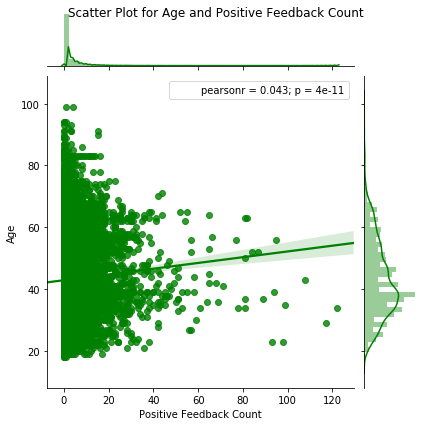

In [4]:
sns.jointplot(x='Positive Feedback Count', y='Age', data= rev, kind='reg', color='g')
plt.suptitle('Scatter Plot for Age and Positive Feedback Count')
plt.show()

### We calculate the count and mean group by Clothing ID of Rating, Recommended IND, Age and Positive Feedback Count. 

In [5]:
stat = (rev.groupby('Clothing ID')[["Rating","Recommended IND", "Age", "Positive Feedback Count"]].aggregate(['count','mean']))
stat.columns = ["Rating_Count","Rating_Mean","Recommended_Count", "Recommended_Mean","Age_Count","Age_Mean", "Positive_Feedback_count", "Positive_Feedback_mean"]

#### Correlation between Recommended Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


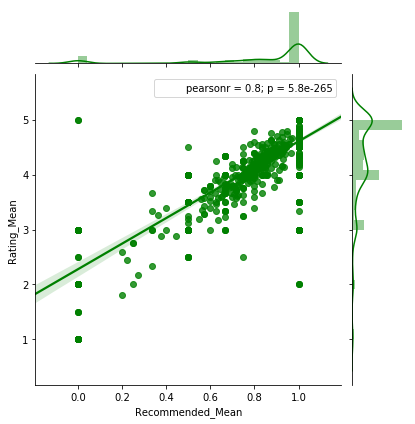

In [6]:
sns.jointplot(x="Recommended_Mean", y="Rating_Mean", data= stat, kind="reg", color="g")

There is a strong positive correlation of 0.8 between rating and recommended IND mean.

#### Correlation between Recommended Mean and Positive Feedback Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.18400664349247886
p value = 1.2064578571161925e-10


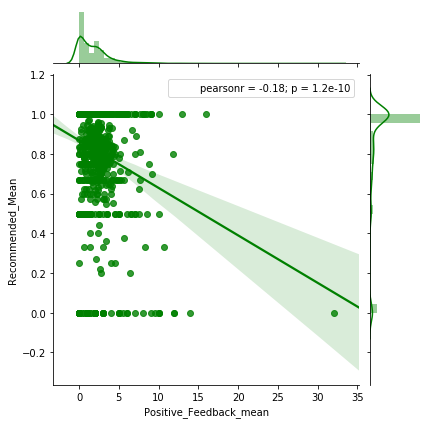

In [7]:
sns.jointplot(x="Positive_Feedback_mean", y="Recommended_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Recommended_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

#### Correlation between Positive Feedback Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.1867906390887257
p value = 6.248514221597484e-11


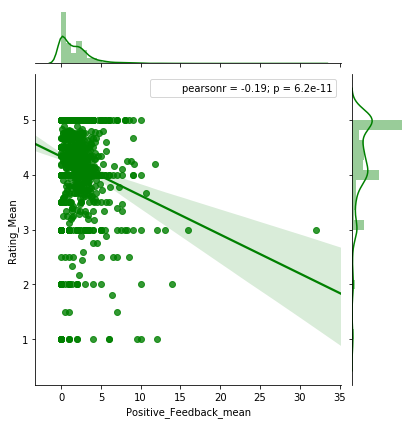

In [8]:
sns.jointplot(x="Positive_Feedback_mean", y="Rating_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Rating_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

#### Correlation Matrix.

This matrix investigates if there is trend between average rating and number of reviews by product.

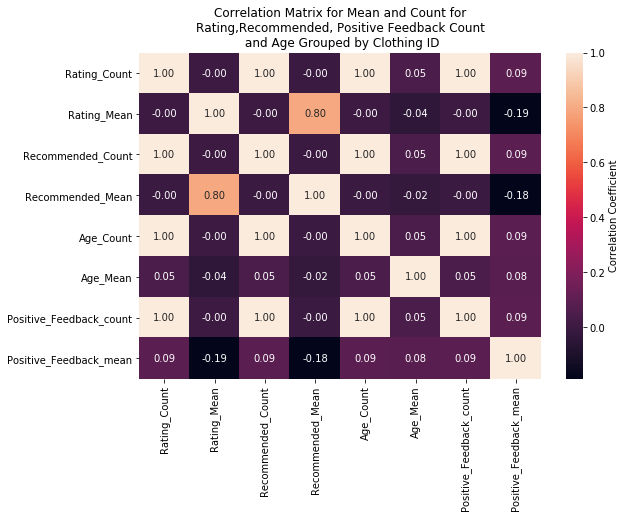

In [9]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(stat.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, Positive Feedback Count\n and Age Grouped by Clothing ID")
plt.show()

From the heatmap, we can understand that there isn't correlation between count and average value. But, we can see also that there is a strong positive correlation of .80 between rating and recommended IND mean as the plot above shown.

###### We generate bootstrap samples from Rating data

The 95% confidence interval is: [4.18193818 4.21025398]


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


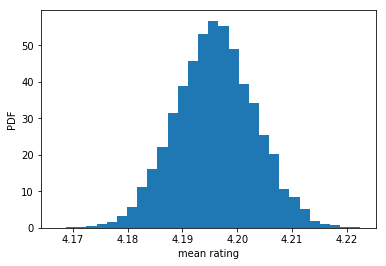

In [10]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Take 10,000 bootstrap replicates of the mean
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(rev['Rating'], np.mean)
    
    
# Compute the 95% confidence interval
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print ("The 95% confidence interval is: " + str(conf_int_95))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean rating')
_ = plt.ylabel('PDF')
plt.show()

Text(0,0.5,'Count')

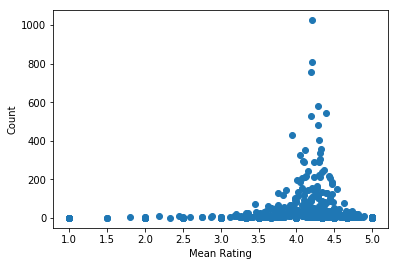

In [11]:
plt.scatter(x="Rating_Mean", y= "Rating_Count", data=stat)
plt.xlabel('Mean Rating')
plt.ylabel('Count')

In [12]:
stat.head()

,Rating_Count,Rating_Mean,Recommended_Count,Recommended_Mean,Age_Count,Age_Mean,Positive_Feedback_count,Positive_Feedback_mean
Clothing ID,,,,,,,,
0,1,5.0,1,1.000000,1,26.000000,1,0.000000
1,3,4.0,3,0.666667,3,36.666667,3,0.333333
2,1,4.0,1,1.000000,1,28.000000,1,0.000000
3,1,5.0,1,1.000000,1,36.000000,1,0.000000
4,1,5.0,1,1.000000,1,28.000000,1,0.000000


Age feature: compute the Empirical cumulative distribution function (ECDF) and plot it

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


import numpy as np
mean = np.mean(rev['Age'])
std = np.std(rev['Age'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(rev['Age'])
x_theor, y_theor = ecdf(samples)

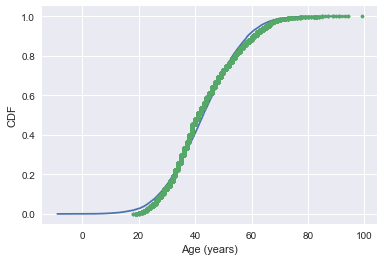

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Age (years)')
_ = plt.ylabel('CDF')
plt.show()

In [15]:
# Take 10,000 bootstrap replicates of the mean
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(rev['Age'], np.mean)
    
    
# Compute the 95% confidence interval
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print ("The 95% confidence interval is: " + str(conf_int_95))

The 95% confidence interval is: [43.04436579 43.35455803]


### Statistics with rev_new file

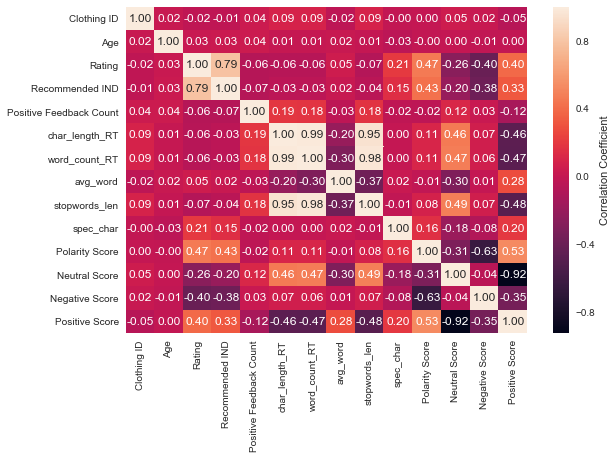

In [16]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(rev_new.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


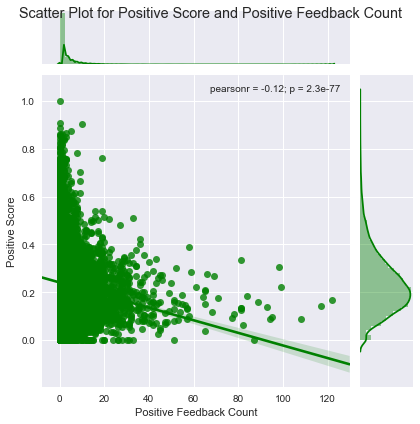

In [17]:
sns.jointplot(x='Positive Feedback Count', y='Positive Score', data= rev_new, kind='reg', color='g')
plt.suptitle('Scatter Plot for Positive Score and Positive Feedback Count')
plt.show()